In [1]:
import twint

import networkx as nx
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import powerlaw
warnings.filterwarnings('ignore')

from wordcloud import WordCloud
import math
from operator import itemgetter

%matplotlib inline 

In [2]:
df=pd.read_csv("../Dataset FFF/fff.csv")
df.head(5)

,clean_tags,hashtags,date,user_id,username,name,tweet,language,mentions,replies_count,retweets_count,likes_count,link,retweet,reply_to
0,"fossilfuels, wind, solar, green, hydrogen, ene...","['fossilfuels', 'wind', 'solar', 'green', 'hyd...",2022-07-10,59386332,arikring,Arik Ring - Energy Engineering Expert,@ProfStrachan @ECOWARRIORSS @ChristineMilne @m...,en,"[{'screen_name': 'guytaur', 'name': 'scott. tr...",2,54,59,https://twitter.com/arikring/status/1546251358...,False,"[{'screen_name': 'ProfStrachan', 'name': 'Prof..."
1,fridaysforfuture,['fridaysforfuture'],2022-07-10,1096766566279073792,parents4future,Parents For Future #EndFossilFuels,"Eltern wissen, wer hier dumm ist. #FridaysForF...",de,[],21,54,595,https://twitter.com/parents4future/status/1546...,False,[]
2,fridaysforfuture,['fridaysforfuture'],2022-07-10,126978307,kl_stone,Klaus Steinfelder,SERVICETWEET: Zur aktuellen Hetze der BLÖD-Ze...,de,[],2,5,8,https://twitter.com/Kl_Stone/status/1546221657...,False,[]
3,fridayforfuture,['fridayforfuture'],2022-07-10,403735368,hahnflo,Florian Hahn,"Wer erklärt #FridayForFuture, dass es ohne NAT...",de,[],127,65,679,https://twitter.com/hahnflo/status/15461339384...,False,[]
4,"klimakrise, govegan, fridaysforfuture","['klimakrise', 'govegan', 'fridaysforfuture']",2022-07-10,1529883123881857031,vegancardio,Der vegane Kardiologe,"Was sind das eigentlich für Menschen, die sich...",de,[],79,25,348,https://twitter.com/VeganCardio/status/1546127...,False,[]


In [3]:
#Seleziono le seguenti colonne: hashtag, date, lingue, tweet e faccio un subdf
df_new = df.iloc[:, [0,2,6,7,9,10,11]]

In [4]:
#Aggiungo la colonna dei mesi che ci potrà essere utile
df_new['date'] = pd.to_datetime(df_new['date'])

In [9]:
df_new['Year'] = df_new['date'].dt.year 
df_new['Month'] = df_new['date'].dt.month 
df_new['Day'] = df_new['date'].dt.day

In [10]:
df_new.insert(2, 'Month', df_new.pop('Month'))

In [11]:
df_new.head(2)

,clean_tags,date,Month,tweet,language,replies_count,retweets_count,likes_count,Year,Day
0,"fossilfuels, wind, solar, green, hydrogen, ene...",2022-07-10,7,@ProfStrachan @ECOWARRIORSS @ChristineMilne @m...,english,2,54,59,2022,10
1,fridaysforfuture,2022-07-10,7,"Eltern wissen, wer hier dumm ist. #FridaysForF...",german,21,54,595,2022,10


In [9]:
#Guardo quali sono le lingue nel nostro dataset:
lingue= set(df_new["language"])
lingue

{'ar',
 'bg',
 'bn',
 'ca',
 'cs',
 'cy',
 'da',
 'de',
 'el',
 'en',
 'es',
 'et',
 'eu',
 'fa',
 'fi',
 'fr',
 'hi',
 'ht',
 'hu',
 'in',
 'is',
 'it',
 'iw',
 'ja',
 'ko',
 'lt',
 'lv',
 'ne',
 'nl',
 'no',
 'pl',
 'pt',
 'qht',
 'qme',
 'ro',
 'ru',
 'sl',
 'sr',
 'sv',
 'ta',
 'te',
 'th',
 'tl',
 'tr',
 'uk',
 'und',
 'ur',
 'vi',
 'zh'}

In [7]:
df_new=df_new.replace("ar", "Arabic")
df_new=df_new.replace("am", "Amharic")
df_new=df_new.replace("hy", "Armenian")
df_new=df_new.replace("bn", "Bangla")
df_new=df_new.replace("bg", "bulgarian")
df_new=df_new.replace("my", "burmese")
df_new=df_new.replace("ckb", "central kurdish")
df_new=df_new.replace("sh", "chinese")
df_new=df_new.replace("da", "danish")
df_new=df_new.replace("dv", "divehi")
df_new=df_new.replace("nl", "dutch")
df_new=df_new.replace("en", "english")
df_new=df_new.replace("et", "estonia")
df_new=df_new.replace("fi", "finnish")
df_new=df_new.replace("fr", "french")
df_new=df_new.replace("ka", "georgian")
df_new=df_new.replace("de", "german")
df_new=df_new.replace("el", "greek")
df_new=df_new.replace("gu", "gujarati")
df_new=df_new.replace("ht", "haitian creol")
df_new=df_new.replace("he", "hebrew")
df_new=df_new.replace("hi", "hindi")
df_new=df_new.replace("hu", "hungarian")
df_new=df_new.replace("is", "icelandic")
df_new=df_new.replace("id", "indonesian")
df_new=df_new.replace("it", "italian")
df_new=df_new.replace("ja", "japanese")
df_new=df_new.replace("kn", "kannada")
df_new=df_new.replace("km", "khmer")
df_new=df_new.replace("ko", "korean")
df_new=df_new.replace("lo", "lao")
df_new=df_new.replace("lv", "lavtian")
df_new=df_new.replace("lt", "lithuanian")
df_new=df_new.replace("ml", "mlayalam")
df_new=df_new.replace("mr", "marathi")
df_new=df_new.replace("ne", "nepali")
df_new=df_new.replace("no", "norwegian")
df_new=df_new.replace("or", "odia")
df_new=df_new.replace("ps", "pashto")
df_new=df_new.replace("fa", "persian")
df_new=df_new.replace("pl", "polish")
df_new=df_new.replace("pt", "portugese")
df_new=df_new.replace("pa", "punjabi")
df_new=df_new.replace("pa", "punjabi")
df_new=df_new.replace("ro", "romanian")
df_new=df_new.replace("ru", "russian")
df_new=df_new.replace("es", "spanish")
df_new=df_new.replace("sr", "serbian")
df_new=df_new.replace("sd", "sindhi")
df_new=df_new.replace("si", "sinhala")
df_new=df_new.replace("sl", "slovenian")
df_new=df_new.replace("sv", "swedish")
df_new=df_new.replace("tl", "tagalog")
df_new=df_new.replace("ta", "tamil")
df_new=df_new.replace("te", "telugu")
df_new=df_new.replace("th", "thai")
df_new=df_new.replace("bo", "tibetian")
df_new=df_new.replace("tr", "turkish")
df_new=df_new.replace("ir", "urdu")
df_new=df_new.replace("ug", "uyghur")
df_new=df_new.replace("vi", "vietnamese")

In [12]:
df_new=df_new[df_new['Year']==2021]

In [13]:
#Salvo le modifiche nel df nuovo
df_new.to_csv('../Dataset FFF/fff_LINGUE.csv', index=False)

In [28]:
#CREAZIONE NETWORK
df1=pd.read_csv("../Dataset FFF/fff_LINGUE.csv")
df1.tail(5)

,clean_tags,date,Month,tweet,language,replies_count,retweets_count,likes_count,Year,Day
5905,"climatestrike, fridaysforfuture, climatestrike...",2021-01-01,1,#ClimateStrike Week36 環境活動家の皆さん、今年もよろしくお願いします。...,japanese,4,20,65,2021,1
5906,"climatestrike, india, year2021, fridaysforfutu...",2021-01-01,1,Week 25th #ClimateStrike🌍 in #India🇮🇳 The plan...,english,34,256,1184,2021,1
5907,"climatestrike, fightfor1point5, facetheclimate...",2021-01-01,1,Week 14th #ClimateStrike . Another year to mak...,english,7,32,142,2021,1
5908,"ohnemeinenphysiotherapeuten, therapeutenamlimi...",2021-01-01,1,Guten Morgen vom Hirschgarten 👋😷Jetzt sind wir...,german,7,5,15,2021,1
5909,dannenroederforst,2021-01-01,1,Neujahr 2021 am #Dannenroederforst wegen dem S...,german,3,9,31,2021,1


In [45]:
#Ti crea un dizionario in cui le chiavi sono i tag singoli e i valori sono gli id degli user
tags_dict = {}
for i in range(len(df1)):
    ll = df1["clean_tags"][i].split(",")
    for tg in ll:
        tgs=tg.lstrip()
        if tgs not in tags_dict:
            tags_dict[tgs] = [df1["language"][i]]
        else:
            tags_dict[tgs].append(df1["language"][i])

In [30]:
tags_dict

{'fridaysforfuture': ['german',
  'german',
  'german',
  'english',
  'english',
  'english',
  'english',
  'spanish',
  'english',
  'german',
  'swedish',
  'qme',
  'english',
  'english',
  'english',
  'japanese',
  'english',
  'english',
  'english',
  'english',
  'english',
  'english',
  'english',
  'english',
  'english',
  'english',
  'english',
  'english',
  'english',
  'swedish',
  'english',
  'english',
  'english',
  'english',
  'english',
  'english',
  'german',
  'english',
  'english',
  'english',
  'english',
  'english',
  'english',
  'german',
  'german',
  'english',
  'german',
  'german',
  'german',
  'german',
  'english',
  'german',
  'german',
  'english',
  'german',
  'english',
  'english',
  'english',
  'english',
  'english',
  'english',
  'english',
  'english',
  'english',
  'english',
  'italian',
  'italian',
  'english',
  'english',
  'english',
  'english',
  'english',
  'english',
  'english',
  'english',
  'german',
  'english

In [31]:
#Crea la lista di tags dalle chiavi del dizionario e li associa alla variabile tag
tags = list(tags_dict.keys())
#crea una lista costituita da coppie di tags
couple_tags = []
for i in range(len(tags)):
    for j in tags[i+1:]:
        couple_tags.append((tags[i], j)) 

In [63]:
source = []
target = []
count = []
label = []
nodes = []
for i in couple_tags:
    ll = list(set(tags_dict[i[0]]) & set(tags_dict[i[1]]))
    if len(ll)>0:
        source.append(i[0])
        target.append(i[1])
        count.append(len(ll))
        nodes.append(i[0])
        nodes.append(i[1])

In [64]:
new_df = pd.DataFrame({"Id": nodes})
new_df.to_csv("../Dataset FFF/nodes_LINGUE.csv", index=False)

In [67]:
new_df = pd.DataFrame({"Source": source,
                       "Target": target,
                      "Count": count,
                      "Label": label})
new_df.to_csv("../Dataset FFF/edges_LINGUE.csv", index=False)

KeyboardInterrupt: 

In [35]:
path = "../Dataset FFF/edges_LINGUE.csv"
path_nodes = "../Dataset FFF/nodes_LINGUE.csv"

In [36]:
fff = pd.read_csv(path)
fff1 = pd.read_csv(path_nodes)

In [50]:
fff=fff.sort_values("Count", ascending=False)

In [58]:
fff1=fff[fff['Count'] >= 3]
fff1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1139 entries, 1 to 38956
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Source  1139 non-null   object
 1   Target  1139 non-null   object
 2   Count   1139 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 35.6+ KB


In [62]:
fff1.to_csv("../Dataset FFF/edges_LINGUE_POCO.csv", index=False)

In [60]:
G = nx.read_edgelist(fff1, comments = "S", delimiter = ",", data=(("Count", int),))

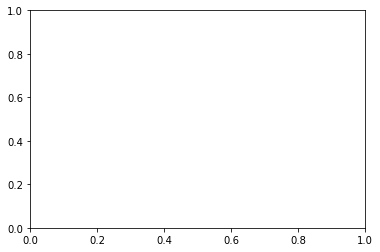

In [61]:
edges = nx.draw_networkx_edges(G, pos=nx.spring_layout(G))